In [13]:
import numpy as np
import pickle
hopper_data = {}
for k in [1]:
    with open('hopper_k%d.pkl' % k, 'rb') as f:
        hopper_data[k] = pickle.load(f)
        
data_keys = [
    'rew_by_head',
    'loss_by_head',
    'kl_by_head',
    'ev_by_head'
]

In [22]:
import matplotlib.pyplot as plt
import seaborn

desired_kl = 2e-3
def plot_unpickled_data(data, bootstrap_heads, skip=[]):
    fig, axes = plt.subplots(5, 1, figsize=(7, 8))
    avgrew_ax, rew_ax, loss_ax, kl_ax, ev_ax = axes
    plt.tight_layout(pad=2.0, h_pad=1.5)

    
    rew_ax.set_title('Average Reward (Rollout Head)')
    rew_x_by_head = data['rew_by_head'][0]
    rew_y_by_head = data['rew_by_head'][1]
    for i in range(bootstrap_heads):
        rew_x, rew_y = rew_x_by_head[i], rew_y_by_head[i]
        rew_ax.plot(rew_x, rew_y, marker='.')
        
    if 'avg' in skip:
        avgrew_ax.remove()
    else:
        avgrew_ax.set_title('100-episode Average Reward')
        for i in range(bootstrap_heads):
            avgrew_x, rew_y = rew_x_by_head[i][100:], rew_y_by_head[i]
            avgrew_y = np.empty(len(rew_y) - 100)
            for i, j in enumerate(range(100, len(rew_y))):
                avgrew_y[i] = np.mean(rew_y[j-100:j])
            avgrew_ax.plot(avgrew_x, avgrew_y, marker='.')
            

    iter_x = data['loss_by_head'][0]
    
    if 'loss' in skip:
        loss_ax.remove()
    else:
        loss_ax.set_title('Loss (After train iteration, by head)')
        loss_y_by_head = data['loss_by_head'][1]
        for i in range(bootstrap_heads):
            loss_y = loss_y_by_head[i]
            loss_ax.plot(iter_x, loss_y)

    kl_ax.set_title('KL')
    kl_y_by_head = data['kl_by_head'][1]
    for i in range(bootstrap_heads):
        kl_y = kl_y_by_head[i]
        kl_ax.plot(iter_x, kl_y)

    ev_ax.set_title('Explained Variance (After update, by head)')
    ev_ax.set_ylim(-1, 1)
    ev_y_by_head = data['ev_by_head'][1]
    for i in range(bootstrap_heads):
        ev_y = ev_y_by_head[i]
        ev_ax.plot(iter_x, ev_y)

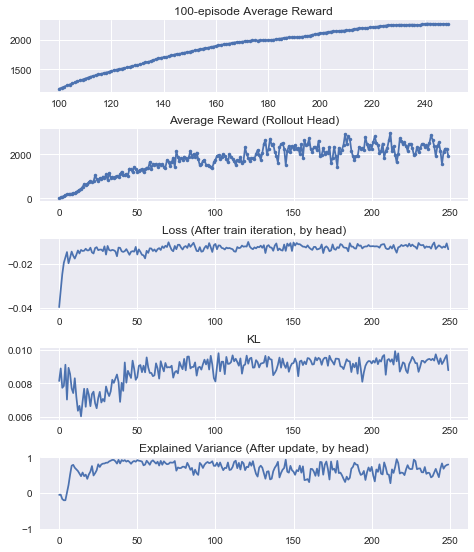

In [23]:
plot_unpickled_data(hopper_data[1], 1)
plt.show()